In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random
from scipy.stats import uniform,beta,norm

**Monte Carlo Sampling** method is to sample $x$ from the $p(x)$ and take the average of all samples to estimate the expectation.
$$\mathbb{E}[f(x)]=\int f(x)p(x)dx \approx \frac{1}{n}\sum_{i=1}^n f(x_i) \qquad x_i\sim p$$

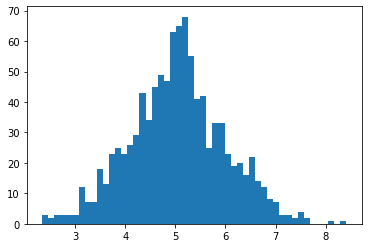

In [2]:
mu,sig,N = 5,1,1000
X = sig*np.random.randn(N)+mu
_ = plt.hist(X,bins=50)

In [3]:
mu_ = sum(X)/N
sig_ = sum((X-mu_)**2)/N
print(mu_,sig_)

5.045865815217911 0.9028513930783005


In [4]:
f = lambda x: (x-mu)**2
target = sig
ans = sum(f(X))/N
print(target,ans)

1 0.9049550660839032


**Importance Sampling**
If $p(x)$ is hard to sample from, we can sample from easy distribution $q(x)$ and calculate the sampling ratio as correction weight to offset the probability sampling from a different distribution.
$$\mathbb{E}[f(x)]=\int f(x)p(x)dx = \int f(x)\frac{p(x)}{q(x)}q(x)dx \approx \frac{1}{n}\sum^n_{i=1}f(x_i)\frac{p(x_i)}{q(x_i)} \qquad x_i\sim q$$

In [5]:
xmin,xmax = 0,9
X = np.random.uniform(xmin,xmax,N)
mu_is = sum(X*norm.pdf(X,mu,sig)/uniform.pdf(X,xmin,xmax))/N
print(mu_is)

4.591056097376715


5.150207478521478


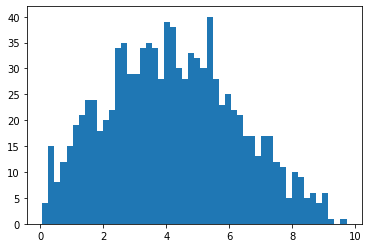

In [6]:
a,b = 2,2.7
scale = mu*2
X = np.random.beta(a,b,N)*scale
_ = plt.hist(X,bins=50)
mu_is = sum(X*norm.pdf(X,mu,sig)/beta.pdf(X,a,b,scale=scale))/N
print(mu_is)